In [55]:
import pandas as pd
import numpy as np
import pylab as plt

## LeNet CNN

In [23]:
results = pd.read_csv('results.csv')

In [89]:
keras_mxnet_lenet = results.loc[results.script == 'keras_mxnet_lenet']
keras_mxnet_lenet_optimized = results.loc[results.script == 'keras_mxnet_lenet_optimized']
mxnet_lenet_official_sample = results.loc[results.script == 'mxnet_lenet_official_sample']
keras_mxnet_lenet.head()

,infrastructure,model,script,batch size,gpus,accuracy,epochs,time,samples_sec
0,1,lenet,keras_mxnet_lenet,64,0,0.991,12,255.7,235
1,1,lenet,keras_mxnet_lenet,128,0,0.988,12,263.2,228
2,1,lenet,keras_mxnet_lenet,256,0,0.987,12,232.4,258
3,1,lenet,keras_mxnet_lenet,512,0,0.986,12,212.4,283
4,1,lenet,keras_mxnet_lenet,64,1,0.982,12,5.9,10203


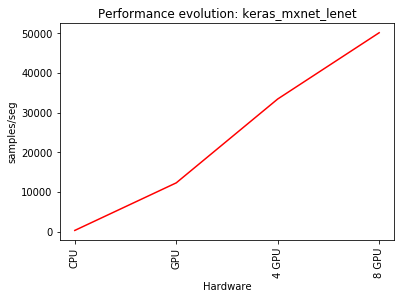

In [94]:
def printResult(title, dataframe, range_acc):
    cpu = dataframe.loc[dataframe.gpus == 0]
    gpu = dataframe.loc[dataframe.gpus == 1]
    multigpu4 = dataframe.loc[dataframe.gpus == 4]
    multigpu8 = dataframe.loc[dataframe.gpus == 8]

    best_cpu = cpu.loc[(cpu.accuracy >= range_acc[0]) & (cpu.accuracy <= range_acc[1])]
    best_gpu = gpu.loc[(gpu.accuracy >= range_acc[0]) & (gpu.accuracy <= range_acc[1])]
    best_multigpu4 = multigpu4.loc[(multigpu4.accuracy >= range_acc[0]) & (multigpu4.accuracy <= range_acc[1])]
    best_multigpu8 = multigpu8.loc[(multigpu8.accuracy >= range_acc[0]) & (multigpu8.accuracy <= range_acc[1])]

    x_values = [1,2,3,4]
    y_values = [best_cpu.samples_sec.max(),
            best_gpu.samples_sec.max(),
            best_multigpu4.samples_sec.max(),
            best_multigpu8.samples_sec.max()]

    labels = list(['CPU', 'GPU', '4 GPU', '8 GPU'])
    plt.plot(x_values, y_values, 'r')
    plt.xticks(x_values, labels, rotation='vertical')
    plt.xlabel('Hardware')
    plt.ylabel('samples/seg')
    plt.title('Performance evolution: ' + title)
    plt.show()


printResult("keras_mxnet_lenet", keras_mxnet_lenet, [e)
#printResult(keras_mxnet_lenet_optimized, [0.980,1])